In [16]:
import os
import pydicom
import pandas as pd
import pylab

In [2]:
data_dir = os.path.expanduser("~/.kaggle/competitions/rsna-pneumonia-detection-challenge")
image_dir = os.path.join(data_dir, "stage_1_train_images")
data_dir

'/home/roman/.kaggle/competitions/rsna-pneumonia-detection-challenge'

In [3]:
!ls /home/roman/.kaggle/competitions/rsna-pneumonia-detection-challenge

GCP%20Credits%20Request%20Link%20-%20RSNA.txt  stage_1_test_images.zip
stage_1_detailed_class_info.csv		       stage_1_train_images
stage_1_detailed_class_info.csv.zip	       stage_1_train_images.zip
stage_1_sample_submission.csv		       stage_1_train_labels.csv
stage_1_test_images			       stage_1_train_labels.csv.zip


In [4]:
fnames = os.listdir(image_dir)
fname = fnames[0]

In [5]:
len(fnames)

25684

In [6]:
ds = pydicom.dcmread(os.path.join(image_dir, fname)) 

In [7]:
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.29039.1517874489.277036
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: AP'
(0010, 0010) Patient's Name                      PN: '660413b7-c06e-4194-9157-be698934cbcc'
(0010, 0020) Patient ID                          LO: '660413b7-c06e-4194-9157-be698934cbcc'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [8]:
im = ds.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


(-0.5, 1023.5, 1023.5, -0.5)

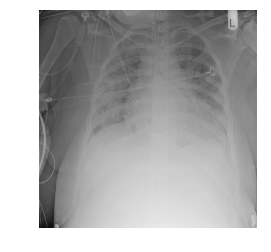

In [10]:
pylab.imshow(im, cmap=pylab.cm.gist_gray)
pylab.axis('off')

In [11]:
class_info = pd.read_csv(os.path.join(data_dir, "stage_1_detailed_class_info.csv"))
class_info.describe()

,patientId,class
count,28989,28989
unique,25684,3
top,0ab261f9-4eb5-42ab-a9a5-e918904d6356,No Lung Opacity / Not Normal
freq,4,11500


In [12]:
class_info['class'].value_counts()

No Lung Opacity / Not Normal    11500
Lung Opacity                     8964
Normal                           8525
Name: class, dtype: int64

In [13]:
class_info.sample(5)

,patientId,class
22000,c76522dc-630a-4cc9-a2b7-bc7f21c91f4d,No Lung Opacity / Not Normal
7190,54ebec21-d065-4f5f-81b7-9ac9a207e4e0,No Lung Opacity / Not Normal
27348,f2e71eff-2656-4b52-a014-eea3d0d00efc,Lung Opacity
2586,32c41ed0-6704-465c-94d3-3073b9b4415e,Lung Opacity
9536,682bd80b-cd68-4e23-be69-e50c1e5a2617,No Lung Opacity / Not Normal
